# Handy Python Pandas for Data Aggregation

__Data Cleaning & Data Preparation Series — <code> df.groupby(), df.pivot_table(), df.melt()</code>__

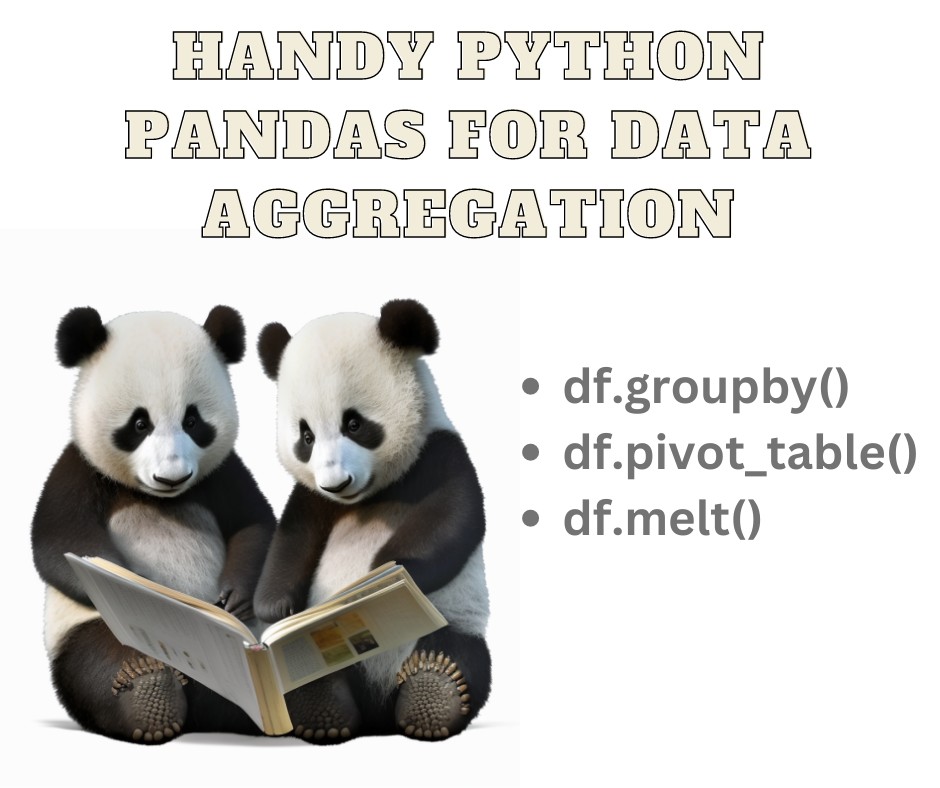

You can download the Jupyter notebook of this tutorial <i>here</i>

### Table of Contents
### 1. Introduction

### 2. Grouping Data

### 3. Pivot Tables

### 4. Reshaping Data

### 1. Introduction

In today's world, data is being generated at an unprecedented rate. From social media platforms to e-commerce websites, there is an abundance of data available that can help organizations make better decisions. However, with so much data, it can be challenging to make sense of it all. This is where pandas come in.

Pandas is a powerful library in Python that is designed for data manipulation and analysis. It is built on top of NumPy and provides an efficient way to work with structured data. Pandas is ideal for tasks such as cleaning, filtering, and aggregating data, and in this post, I will be using the __House Price data. this data__

#### What is Data Aggregation?
Aggregation is the process of combining data from multiple sources into a single summary. It is a critical step in data analysis because it helps us to get a better understanding of the data we are working with. It is the process of summarizing, grouping, and condensing data. 
The goal of data aggregation is to gain insights from large datasets and to make the data more manageable. There are many ways to aggregate data in Pandas, including:
#### 2. Using the Groupby Function
Grouping is the process of dividing a dataset into smaller subsets based on one or more variables. It is a common method used to explore and analyze data. 
The groupby() function in pandas is incredibly flexible and can be used to group data by one or more columns. We can use the groupby() function to group data by one or more variables, and then apply various aggregation functions to the groups.
#### 2.1 Aggregating Data by Single Column using groupby()

First, We import the Pandas library, and read the dataset into a DataFrame. 

In [120]:
import pandas as pd
#df = pd.read_csv("D:/Learner CARES/Online Business/Medium/Programming Language/AMES/AMES Housing Dataset.csv")
df = pd.read_csv('https://raw.githubusercontent.com/learnercares/Python-for-Data-Science/main/AMES%20Housing%20Dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
df_agg = df.groupby('YrSold')['SalePrice'].mean()
print(df_agg)

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64


#### 2.2 Aggregating Data by Multiple Columns  using groupby()
In some cases, you may want to group the data by multiple columns. This can be done by passing a list of column names to the groupby() function.

In [52]:
df_agg = df.groupby(['YrSold','Street','SaleCondition'])['SalePrice'].mean()
print(df_agg)

YrSold  Street  SaleCondition
2006    Pave    Abnorml          142857.363636
                AdjLand          104250.000000
                Alloca           274970.000000
                Family           138500.000000
                Normal           175522.612335
                Partial          259793.813953
2007    Grvl    Normal           152600.000000
        Pave    Abnorml          198346.153846
                AdjLand          126000.000000
                Alloca           216398.333333
                Family           176142.857143
                Normal           175484.840304
                Partial          254259.225000
2008    Grvl    Normal           154975.000000
        Pave    Abnorml          154500.000000
                AdjLand           82000.000000
                Alloca           157629.500000
                Normal           172192.996183
                Partial          303213.812500
2009    Pave    Abnorml          132692.173913
                Alloca        

This will group the data by both product_name and region and then calculate the sum of the sales for each combination of product and region.

#### 2.3 Applying Multiple Functions to Grouped Data
In addition to applying a single function to each group, you can also apply multiple functions. This can be done using the agg() function. For example:

In [87]:
# aggregate data by YrSold and SaleType columns
df_agg = df.groupby(['YrSold','SaleType'])['SalePrice'].agg(['count','min','max','mean','sum'])
# print aggregated data
print(df_agg)

                 count     min     max           mean       sum
YrSold SaleType                                                
2006   COD           5  102000  140000  119700.000000    598500
       ConLD         2  140000  160000  150000.000000    300000
       ConLI         1  125000  125000  125000.000000    125000
       ConLw         1  144000  144000  144000.000000    144000
       New          43  140000  556581  259793.813953  11171134
       Oth           1  116050  116050  116050.000000    116050
       WD          261   35311  625000  171899.793103  44865846
2007   COD           5  114500  217000  153880.000000    769400
       CWD           3  136000  219500  171166.666667    513500
       New          40  147000  440000  254259.225000  10170369
       Oth           2   93500  150000  121750.000000    243500
       WD          279   39300  755000  177483.899642  49518008
2008   COD          14   85400  287000  149796.428571   2097150
       CWD           1  328900  328900  

# OR

In [88]:
# aggregate data by YrSold and SaleType columns
df_agg = df.groupby(['YrSold','SaleType']).agg({'SalePrice':['count', 'min','max','mean','sum']})

# rename columns
df_agg.columns = ['_'.join(col).strip() for col in df_agg.columns.values]

# reset index
df_agg = df_agg.reset_index()

# print aggregated data
print(df_agg)

    YrSold SaleType  SalePrice_count  SalePrice_min  SalePrice_max  \
0     2006      COD                5         102000         140000   
1     2006    ConLD                2         140000         160000   
2     2006    ConLI                1         125000         125000   
3     2006    ConLw                1         144000         144000   
4     2006      New               43         140000         556581   
5     2006      Oth                1         116050         116050   
6     2006       WD              261          35311         625000   
7     2007      COD                5         114500         217000   
8     2007      CWD                3         136000         219500   
9     2007      New               40         147000         440000   
10    2007      Oth                2          93500         150000   
11    2007       WD              279          39300         755000   
12    2008      COD               14          85400         287000   
13    2008      CWD 

#### 3. Pivot Tables
Pivot table is a powerful data analysis tool in Pandas that allows you to summarize and manipulate data in a tabular format. It takes a DataFrame as input and groups the data based on one or more columns, applies a set of aggregate functions to the data, and produces a new table of summary statistics. 

Pivot tables help to quickly and easily perform complex data analysis tasks, such as data aggregation, filtering, and sorting. They are widely used in data analysis and data science projects.

Pandas provides a pivot_table() function that makes creating pivot tables easy. We can use the pivot_table() function to create a table that summarizes data by one or more variables, and then apply aggregation functions to the groups.
We will explore how to create pivot tables in Pandas and apply aggregation functions such as mean(), sum(), and count().

#### 2.1 Aggregating Data by Single Column using Pivot

In [54]:
# creating pivot table of total Sale Price
# Year Sold-wise aggfunc = 'sum' will 
# allow you to obtain the sum of sales
# each product
pivot = df.pivot_table(index =['YrSold'], # Categorical variable
                       values =['SalePrice'],
                       aggfunc =['mean'])
print(pivot)

                 mean
            SalePrice
YrSold               
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286


#### 3.2 Aggregating Data by Multiple Columns using pivot_table()

In [55]:
# creating pivot table of total Sale Price
# Year Sold-wise aggfunc = 'sum' will 
# allow you to obtain the sum of sales
# each product
pivot = df.pivot_table(index =['YrSold', 'SaleType'], # Categorical variable
                       values =['SalePrice'],
                       aggfunc ='sum')
print(pivot)

                 SalePrice
YrSold SaleType           
2006   COD          598500
       ConLD        300000
       ConLI        125000
       ConLw        144000
       New        11171134
       Oth          116050
       WD         44865846
2007   COD          769400
       CWD          513500
       New        10170369
       Oth          243500
       WD         49518008
2008   COD         2097150
       CWD          328900
       Con          324000
       ConLD        665528
       ConLw         95000
       New         4501293
       WD         45905824
2009   COD         1998000
       ConLD        283500
       ConLI        761950
       ConLw        479500
       New         5363764
       WD         51761337
2010   COD          727800
       Con          215200
       ConLI        115000
       New         2336781
       WD         27649112


#### 3.3 Applying Multiple Functions to Grouped Data using pivot_table()

In [56]:
# creating pivot table of total Sale Price
# Year Sold-wise aggfunc = 'sum' will 
# allow you to obtain the sum of sales
# each product
pivot = df.pivot_table(index =['YrSold','SaleType'], # Categorical variable
                       values =['SalePrice'],
                       aggfunc =['min','max','mean', 'sum'])
print(pivot)

                      min       max           mean       sum
                SalePrice SalePrice      SalePrice SalePrice
YrSold SaleType                                             
2006   COD         102000    140000  119700.000000    598500
       ConLD       140000    160000  150000.000000    300000
       ConLI       125000    125000  125000.000000    125000
       ConLw       144000    144000  144000.000000    144000
       New         140000    556581  259793.813953  11171134
       Oth         116050    116050  116050.000000    116050
       WD           35311    625000  171899.793103  44865846
2007   COD         114500    217000  153880.000000    769400
       CWD         136000    219500  171166.666667    513500
       New         147000    440000  254259.225000  10170369
       Oth          93500    150000  121750.000000    243500
       WD           39300    755000  177483.899642  49518008
2008   COD          85400    287000  149796.428571   2097150
       CWD         32890

### 4. Reshaping Data using melt(), stack(), and unstack()

Reshaping is the process of converting data from one shape to another. It is a common method used to prepare data for analysis.
Pandas provides many functions for reshaping data, including __melt(), stack(), and unstack()__. These functions allow us to reshape data from a long format to a wide format or vice versa.

### 4.1 melt()
The __melt()__ function takes a DataFrame and reshapes it so that one or more columns are __"melted"__ into a single column, with the values of the original columns being stored in a new "value" column. The function can be used to unpivot a DataFrame and reshape it into a format suitable for further analysis or visualization.

### Example 1

In [91]:
# reshape data using melt function
df_melted = pd.melt(df, id_vars=['YrSold'], value_vars=['1stFlrSF', '2ndFlrSF'],
                    var_name='FlrSF', value_name='SF')
# print melted data
print(df_melted)

      YrSold     FlrSF    SF
0       2008  1stFlrSF   856
1       2007  1stFlrSF  1262
2       2008  1stFlrSF   920
3       2006  1stFlrSF   961
4       2008  1stFlrSF  1145
...      ...       ...   ...
2915    2007  2ndFlrSF   694
2916    2010  2ndFlrSF     0
2917    2010  2ndFlrSF  1152
2918    2010  2ndFlrSF     0
2919    2008  2ndFlrSF     0

[2920 rows x 3 columns]


### Example 2

In [92]:
# reshape data using melt function
df_melted = pd.melt(df, id_vars=['YrSold'], value_vars=['BsmtFinSF1', 'BsmtFinSF2'],
                    var_name='BsmtFinSF', value_name='SF')
# print melted data
print(df_melted)

      YrSold   BsmtFinSF    SF
0       2008  BsmtFinSF1   706
1       2007  BsmtFinSF1   978
2       2008  BsmtFinSF1   486
3       2006  BsmtFinSF1   216
4       2008  BsmtFinSF1   655
...      ...         ...   ...
2915    2007  BsmtFinSF2     0
2916    2010  BsmtFinSF2   163
2917    2010  BsmtFinSF2     0
2918    2010  BsmtFinSF2  1029
2919    2008  BsmtFinSF2   290

[2920 rows x 3 columns]


### Example 3

In [106]:
# Creating a sample data frame
data = {'year': [2010, 2011, 2012],
        'USA': [100, 200, 300],
        'Canada': [150, 250, 350]}

df = pd.DataFrame(data)

# Reshaping the data using melt function
df_melt = df.melt(id_vars='year', var_name='country', value_name='sales')

print(df_melt)

   year country  sales
0  2010     USA    100
1  2011     USA    200
2  2012     USA    300
3  2010  Canada    150
4  2011  Canada    250
5  2012  Canada    350


### 4.2 stack()
The stack function in pandas is used to transform the DataFrame from a wide format to a long format. It takes a level of column labels and pivots them to become the innermost level of row labels, resulting in a stacked DataFrame. This function is used to make the DataFrame more manageable and to perform operations like aggregating data or plotting data using seaborn or matplotlib.

### Example 1

In [115]:
df_FlrSF = df.loc[:,['YrSold','1stFlrSF','1stFlrSF']]
# Reshaping the data using stack function
df_stack = df_FlrSF.set_index('YrSold').stack().reset_index(name='SF').rename(columns={'level_1':'FlrSF'})


#print(df)
print(df_stack)

      YrSold     FlrSF    SF
0       2008  1stFlrSF   856
1       2008  1stFlrSF   856
2       2007  1stFlrSF  1262
3       2007  1stFlrSF  1262
4       2008  1stFlrSF   920
...      ...       ...   ...
2915    2010  1stFlrSF  1188
2916    2010  1stFlrSF  1078
2917    2010  1stFlrSF  1078
2918    2008  1stFlrSF  1256
2919    2008  1stFlrSF  1256

[2920 rows x 3 columns]


### Example 2

In [136]:
# create a sample dataframe
data = {'Name': ['John', 'Jane', 'Peter', 'Mary'],
        'Maths': [90, 80, 70, 60],
        'Science': [85, 75, 65, 55],
        'English': [80, 95, 85, 75]}
df = pd.DataFrame(data)

# stack the dataframe
stacked = df.set_index('Name').stack().reset_index()
stacked.columns = ['Name', 'Subject', 'Score']

# group the data by subject and calculate the mean score
grouped = stacked.groupby('Subject')['Score'].mean().reset_index()

print("\nRaw Data")
print(df)
print("\nStack Data")
print(grouped)


Raw Data
    Name  Maths  Science  English
0   John     90       85       80
1   Jane     80       75       95
2  Peter     70       65       85
3   Mary     60       55       75

Stack Data
   Subject  Score
0  English  83.75
1    Maths  75.00
2  Science  70.00


### 4.3 Unstack
The unstack function in pandas is a method used to convert a stacked DataFrame into a pivoted DataFrame. The stacked DataFrame contains data in a hierarchical index format, where one or more levels of the index are used to group the data. 

The unstack function is used to reverse this process by moving the stacked levels into columns. This creates a pivoted DataFrame with a regular column index that is easier to work with and analyze. 

The unstack function takes the level parameter, which specifies which level of the index to unstack. It can also be used with multiple levels of the index to create a more complex pivoted DataFrame.

### Example 1

In [123]:
df_FlrSF = df.loc[:,['YrSold','1stFlrSF','1stFlrSF']]

# Reshaping the data using unstack function
df_unstack = df_FlrSF.set_index('YrSold').unstack().reset_index(name='FlrSF').rename(columns={'level_0': 'SF'})

print(df_unstack)

            SF  YrSold  FlrSF
0     1stFlrSF    2008    856
1     1stFlrSF    2007   1262
2     1stFlrSF    2008    920
3     1stFlrSF    2006    961
4     1stFlrSF    2008   1145
...        ...     ...    ...
2915  1stFlrSF    2007    953
2916  1stFlrSF    2010   2073
2917  1stFlrSF    2010   1188
2918  1stFlrSF    2010   1078
2919  1stFlrSF    2008   1256

[2920 rows x 3 columns]


### Example 2

In [126]:
# Unstack
# Creating a sample data frame
data = {'year': [2010, 2011, 2012],
        'USA': [100, 200, 300],
        'Canada': [150, 250, 350]}

df = pd.DataFrame(data)

# Reshaping the data using unstack function
df_unstack = df.set_index('year').unstack().reset_index(name='sales').rename(columns={'level_0': 'country'})

print("Raw Data")
print(df)
print("\nUnstack Data")
print(df_unstack)

Raw Data
   year  USA  Canada
0  2010  100     150
1  2011  200     250
2  2012  300     350

Unstack Data
  country  year  sales
0     USA  2010    100
1     USA  2011    200
2     USA  2012    300
3  Canada  2010    150
4  Canada  2011    250
5  Canada  2012    350


### Conclusion
Data aggregation is a crucial step in data analysis and pandas provides a powerful tool for aggregating data in Python. With the help of pandas, we can group and summarize data based on different criteria, compute summary statistics, apply custom functions, and generate reports in various formats. Overall, pandas is a versatile and efficient library for data aggregation that can greatly improve our data analysis workflows.

These are just a few examples of commonly used methods in pandas for data aggregation. The choice of methods to be used depends on the type of data and the analysis to be performed.

__Many thanks for reading post!🙏. Please motivate by liking, sharing and following.__